# Question 1:

Identify the number of records (rows) and columns and list the data types of each column.

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [139]:
df=pd.read_csv('iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [140]:
df.shape

(150, 5)

So there are 150 rows and 5 columns

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Questions 2:

Get the descriptive analysis of the dataset on the numerical columns.

Write a few sentences about analysis of the dataset.



<b>Answer:</b>
So here the iris.csv data contains 5 columns and 150 records.
it has 4 columns of float64 data type `['sepal.length','sepal.width','petal.length','petal.width']` and one column of data type object `['variety']`
<br>
Here there are 3 categories in `variety` column and those categories are considered as results based on first 4 columns and those 3 categories are `['Setosa','Versicolor','Virginica']`

In [142]:
df.describe()


,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


`sepal.length` has a mean of 5.84, std of 0.82 and min value of `sepal.length` is 4.3 , max value of 7.9 .
`sepal.width` has a mean of 3.05, std of 0.43 and min value of `sepal.width` is 2.0 , max value of 4.4 .
`petal.length` has a mean of 3.75, std of 1.76 and min value of `petal.length` is 1.0 , max value of 6.9 .
`petal.width` has a mean of 1.19, std of 0.76 and min value of `petal.width` is 0.1 , max value of 2.5 .

# Questions 3: 

Plot the distributions of “Sepal Length”, and “Petal Length”.

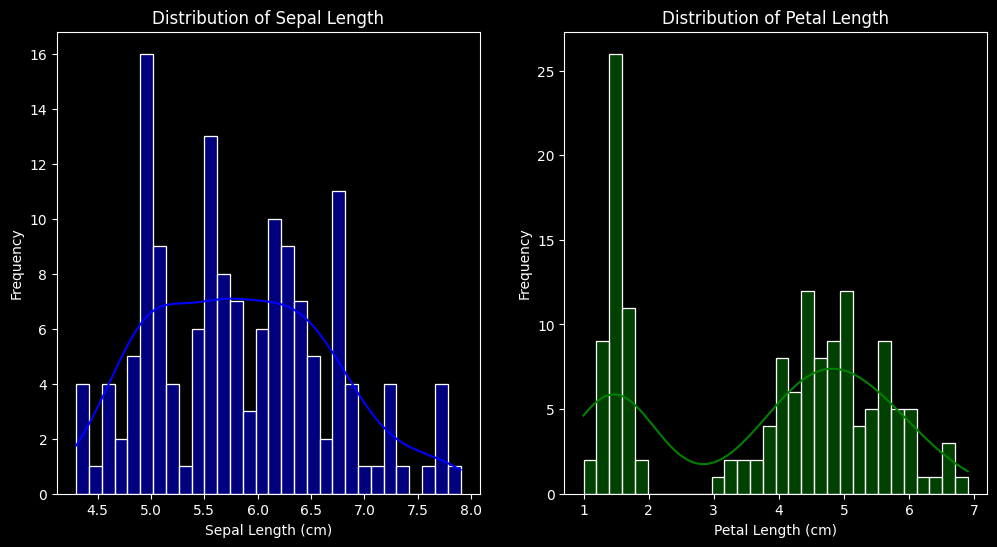

In [143]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['sepal.length'], kde=True, bins=30, color='blue')
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')

# Plot the distribution of Petal Length
plt.subplot(1, 2, 2)
sns.histplot(df['petal.length'], kde=True, bins=30, color='green')
plt.title('Distribution of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')

plt.show()

# Questions 4: 

Visualize the outliers in plots for numerical fields and remove the outliers. 



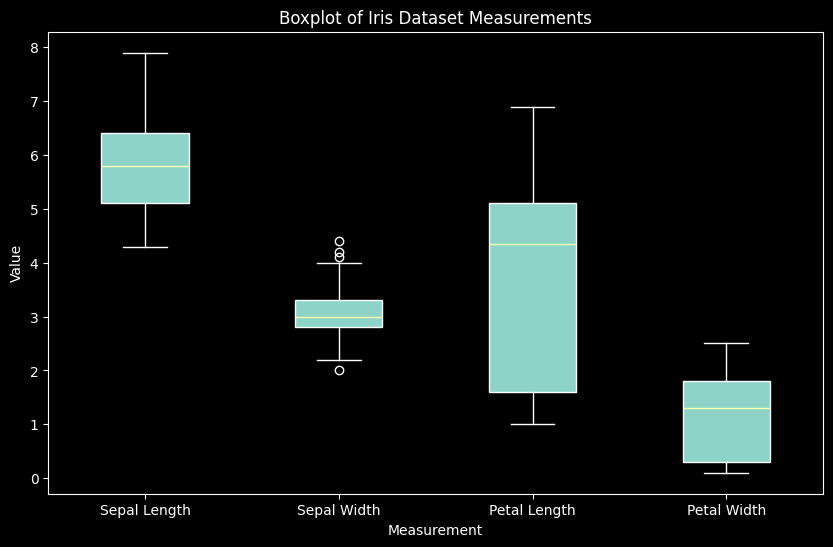

In [144]:
data_to_plot = [df['sepal.length'], df['sepal.width'], df['petal.length'], df['petal.width']]
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, patch_artist=True, labels=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
plt.title('Boxplot of Iris Dataset Measurements')
plt.xlabel('Measurement')
plt.ylabel('Value')
plt.show()

so here we have outliers for sepal.width 

In [145]:
q1=np.quantile(df['sepal.width'],0.25)
q2=np.quantile(df['sepal.width'],0.5)
q3=np.quantile(df['sepal.width'],0.75)
q1,q2,q3

(2.8, 3.0, 3.3)

In [146]:
iqr = q3 - q1
print(f"Q1: {q1}, Q3: {q3}, IQR: {iqr}")

min = q1 - 1.5 * iqr
max = q3 + 1.5 * iqr
print(f"Min: {min}, Max: {max}")

Q1: 2.8, Q3: 3.3, IQR: 0.5
Min: 2.05, Max: 4.05


In [147]:
df['sepal.width'][(df['sepal.width'] < min) | (df['sepal.width'] > max)] =np.nan

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21680\3502176067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sepal.width'][(df['sepal.width'] < min) | (df['sepal.width'] > max)] =np.nan


In [149]:
df['sepal.width'] = df['sepal.width'].ffill().add(df['sepal.width'].bfill()).div(2)


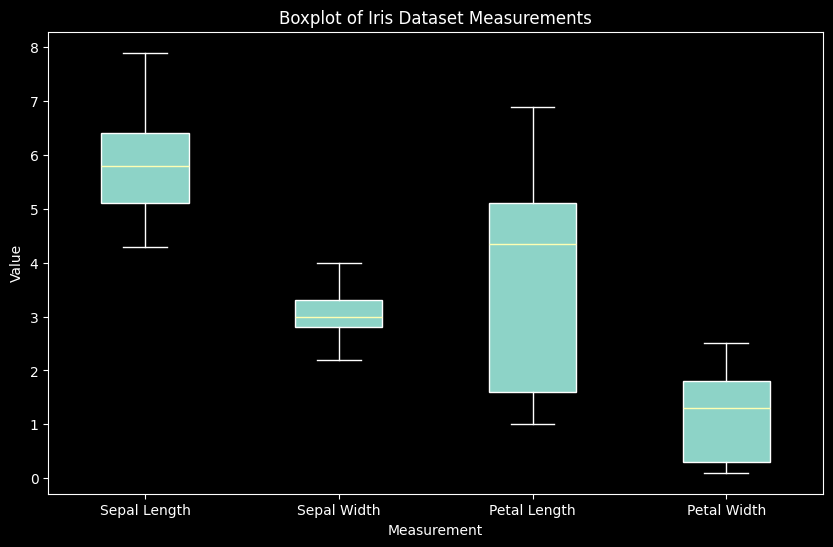

In [151]:
data_to_plot = [df['sepal.length'], df['sepal.width'], df['petal.length'], df['petal.width']]
plt.figure(figsize=(10, 6))
plt.boxplot(data_to_plot, patch_artist=True, labels=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
plt.title('Boxplot of Iris Dataset Measurements')
plt.xlabel('Measurement')
plt.ylabel('Value')
plt.show()

Here i just dropped the outliers and then i have forward filled it and then added with backward fill and then i have dived it 
so the outliers are gone.

# Questions 5:

Check for the missing data and handle them. You must also explain your logic on how to handle the missing values



In [154]:
df.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

Here we dont have any missing values, in the previous question i have dropped the outliers so that can be the missing values  later i have took the mean to fill that missing values.

# Questions 6: 

Identify the categorical data and encode them properly for machine learning



In [160]:
categorical_features=['variety']
encoder=encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
matrix=encoder.fit_transform(df[categorical_features])
encoder_features_names=encoder.get_feature_names_out()
df_encoded=pd.DataFrame(data=matrix,columns=encoder_features_names)
df=pd.merge(df,df_encoded, left_index=True, right_index=True)
df.drop(columns=categorical_features, inplace=True)



In [162]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety_Setosa,variety_Versicolor,variety_Virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0


`variety` is the only column which has just 3 types of categories `setosa`, `versicolor`, `virginica` and can be encoded easily with binary

# Questions 7:

Calculate the Pearson correlation among all the numeric fields. Then apply heatmap coloring on the resulting table to identify high and low correlations using colors.

In [164]:
df.apply(lambda x: pd.factorize(x)[0]).corr(method="pearson").style.background_gradient(cmap="RdYlGn", vmax=1, vmin=-1)

,sepal.length,sepal.width,petal.length,petal.width,variety_Setosa,variety_Versicolor,variety_Virginica
sepal.length,1.000000,0.064169,0.696007,0.637803,0.709993,0.162242,0.547752
sepal.width,0.064169,1.000000,0.148826,0.208337,0.333664,0.274007,0.059657
petal.length,0.696007,0.148826,1.000000,0.873059,0.764150,-0.025335,0.789485
petal.width,0.637803,0.208337,0.873059,1.000000,0.800876,0.021683,0.779192
variety_Setosa,0.709993,0.333664,0.764150,0.800876,1.000000,0.500000,0.500000
variety_Versicolor,0.162242,0.274007,-0.025335,0.021683,0.500000,1.000000,-0.500000
variety_Virginica,0.547752,0.059657,0.789485,0.779192,0.500000,-0.500000,1.000000


Here we can see that highest and lowest correleations 